# Analyzing Geosaptial Data 

# Using Geopandas in Python

In [119]:
#Importing Librareis 
import geopandas as gpd
import matplotlib 

In [120]:
#loading and reading Geospatila data
w_geoData = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
w_geoData

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [121]:
#Calculating pop_density and oredering gdf based on it 

w_geoData['pop_density'] = world_gdf.pop_est / world_gdf.area

w_geoData.sort_values(by='pop_density', ascending=False)

C:\Users\ihasan2020\AppData\Local\Temp\ipykernel_18080\973964968.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  w_geoData['pop_density'] = world_gdf.pop_est / world_gdf.area


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",1.375084e+07
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",9.754682e+06
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",7.744572e+06
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",6.968534e+06
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.647863e+06
...,...,...,...,...,...,...,...
144,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",1.756569e+04
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",1.596242e+03
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",9.770204e+01
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",8.298776e+01


In [122]:
#normalizing colorbar to logscal and setting map size 
norm = matplotlib.colors.LogNorm(
    vmin=world_gdf.pop_density.min(), vmax=world_gdf.pop_density.max())
figsize=(13,7)

Text(0.5, 1.0, ' World Population Density ')

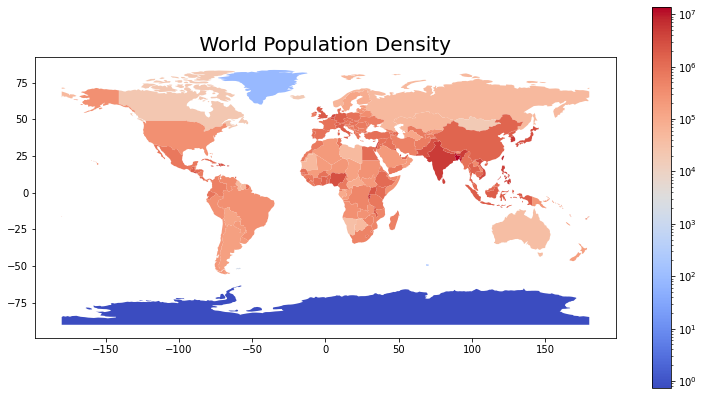

In [123]:
#Changing crs to Mercator projection
#visualizing the density map 
wPopDen= w_geoData.to_crs('epsg:4326').plot("pop_density", 
                                   figsize=figsize, 
                                   legend=True,  
                                   norm=norm,cmap='coolwarm'); 
wPopDen.set_title(" World Population Density ",fontsize=20)